In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
df = pd.read_csv("/content/Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df.shape

(1000, 11)

In [4]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

**EDA**

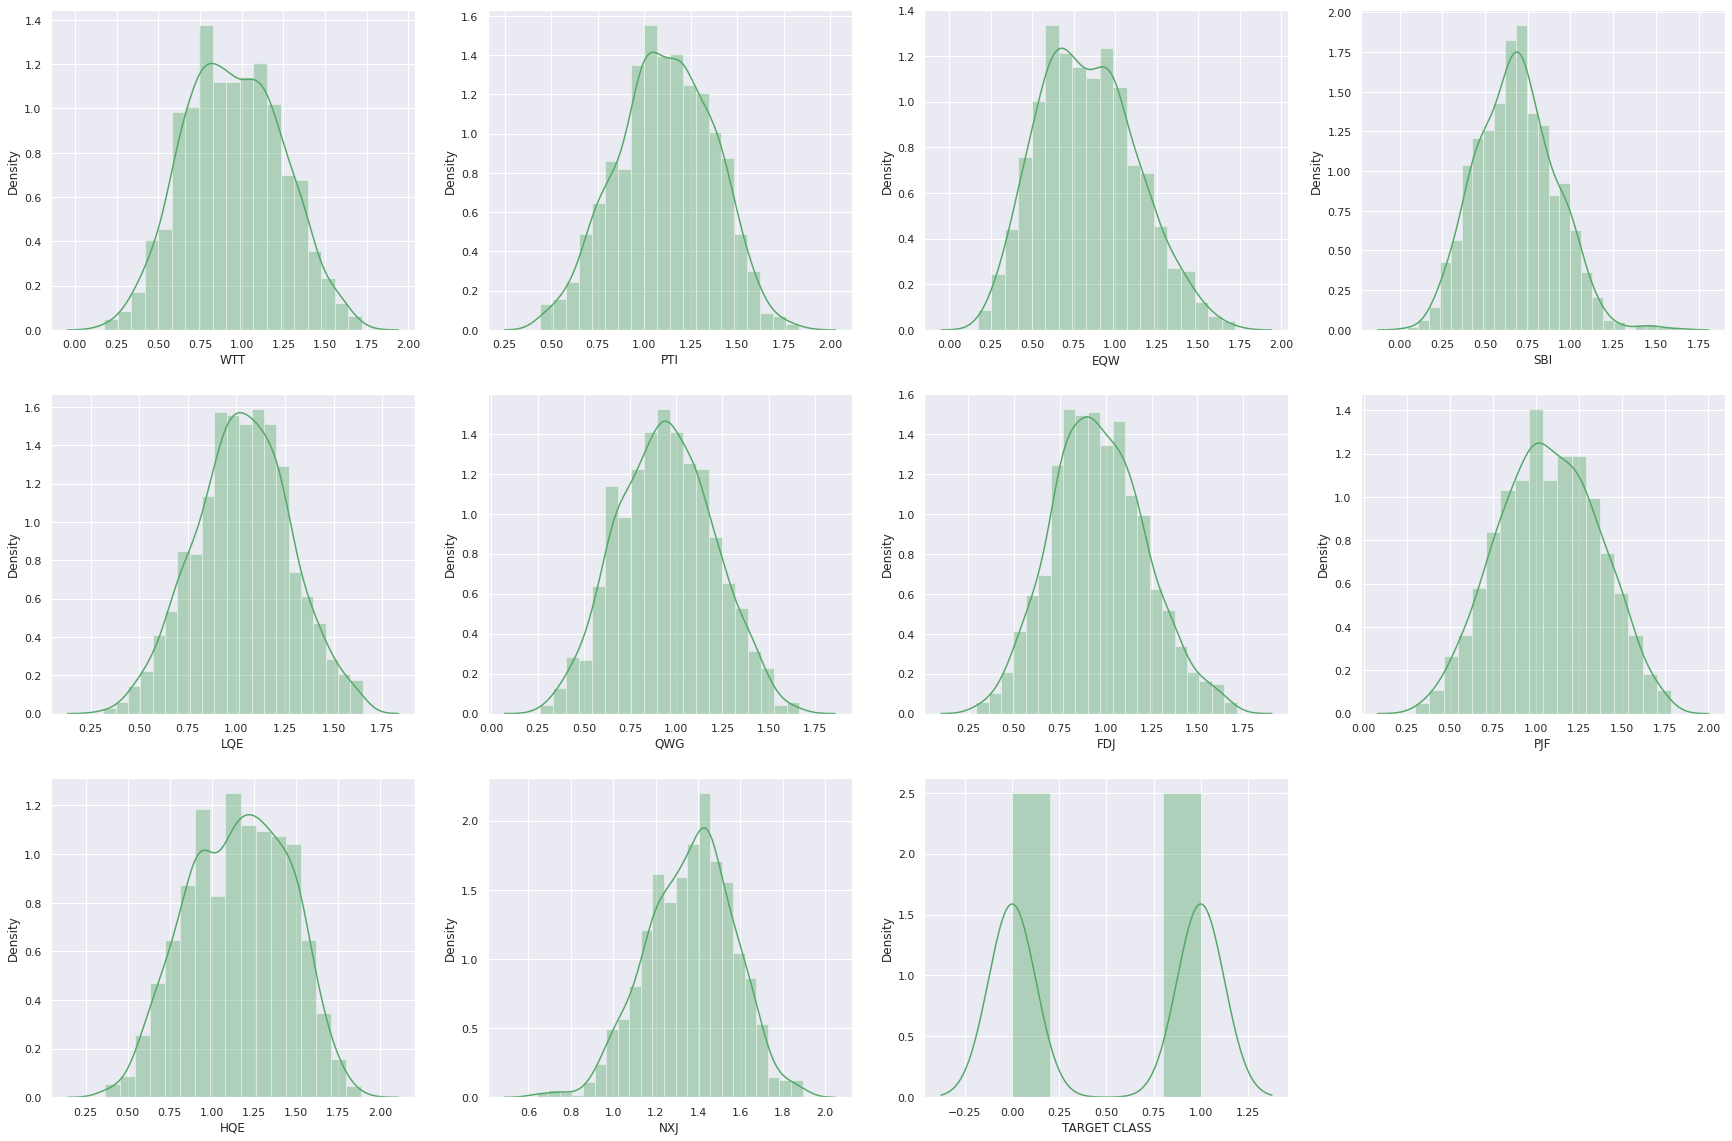

In [7]:
plt.figure(figsize=(30,20))
plotnumber = 1

for column in df.columns:
  if plotnumber <= 12:
    ax = plt.subplot(3,4,plotnumber)
    sns.distplot(df[column],color = 'g')
    plt.xlabel(column)
  plotnumber+=1
plt.show()

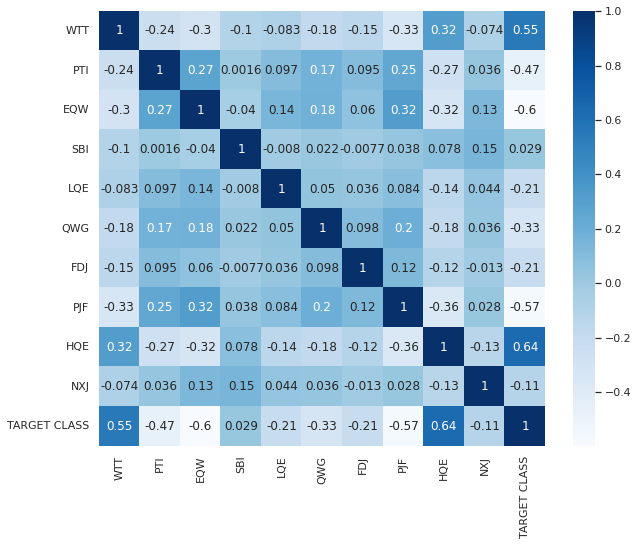

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),cmap="Blues",annot = True)
plt.show()

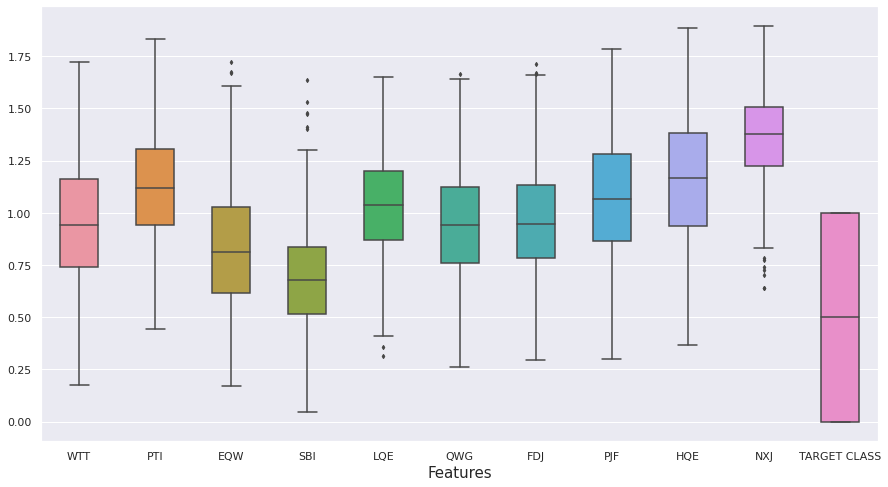

In [9]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = df, width = 0.5,fliersize = 3,ax=ax)
plt.xlabel("Features",fontsize = 15)
plt.show()

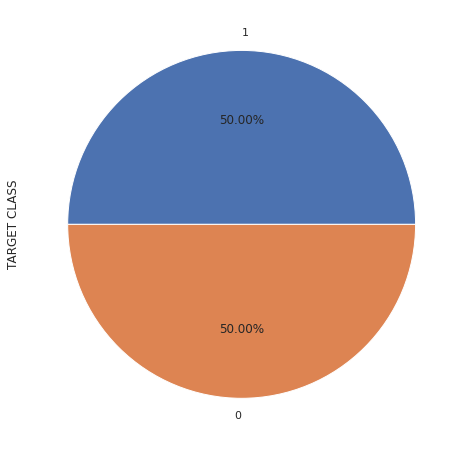

In [10]:
plt.figure(figsize=(8,8))
df['TARGET CLASS'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

**Handling Outliers**

In [11]:
df2 = df.copy()

In [12]:
def outlier_remove_IQR(column):
  # Finding outliers
  percentile_25 = df2[column].quantile(.25)
  percentile_75 = df2[column].quantile(.72)
  IQR = percentile_75 - percentile_25
  upper_lmt = percentile_75 + 1.5*IQR
  lower_lmt = percentile_25 - 1.5*IQR
  print('25 Percentile : ',percentile_25)
  print('75 percentile : ',percentile_75)
  print('Upper limit is : ',upper_lmt)
  print('Lower limit is : ',lower_lmt)
  print('IQR is : ',IQR)
  df2[column] = np.where(df2[column]>upper_lmt,upper_lmt,np.where(df2[column]<lower_lmt,lower_lmt,df2[column]))
  

In [13]:
def comparison_plot(df,df2,column):
    # Comparing data of before and after outlier handling
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df2[column])

    plt.subplot(2,2,4)
    sns.boxplot(df2[column])

    plt.show()

In [14]:
outlier_remove_IQR('SBI')

25 Percentile :  0.515009786791564
75 percentile :  0.8105358219649256
Upper limit is :  1.253824874724968
Lower limit is :  0.07172073403152152
IQR is :  0.2955260351733616


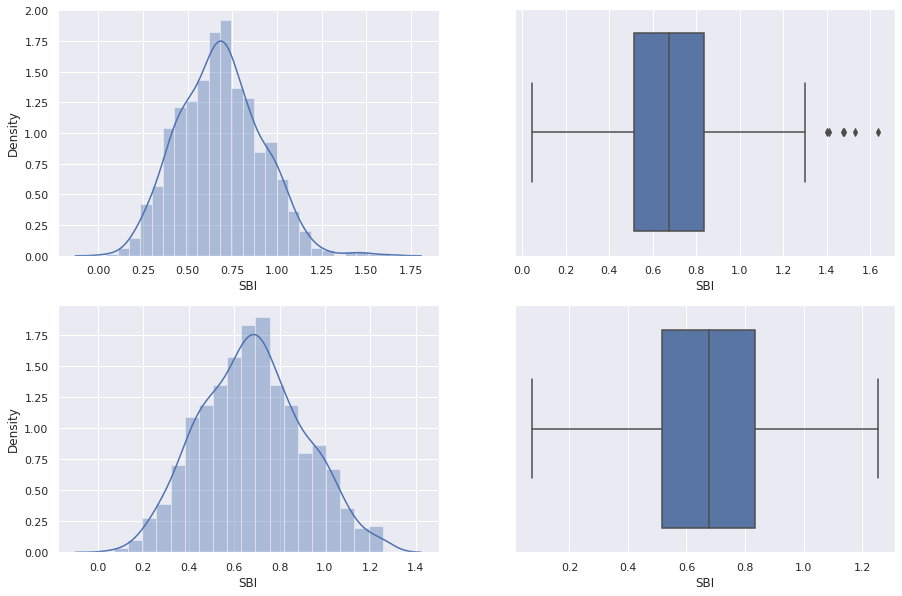

In [15]:
comparison_plot(df,df2,'SBI')

In [16]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [17]:
outlier_remove_IQR('NXJ')

25 Percentile :  1.222622613663366
75 percentile :  1.4827183906589487
Upper limit is :  1.8728620561523228
Lower limit is :  0.8324789481699919
IQR is :  0.26009577699558273


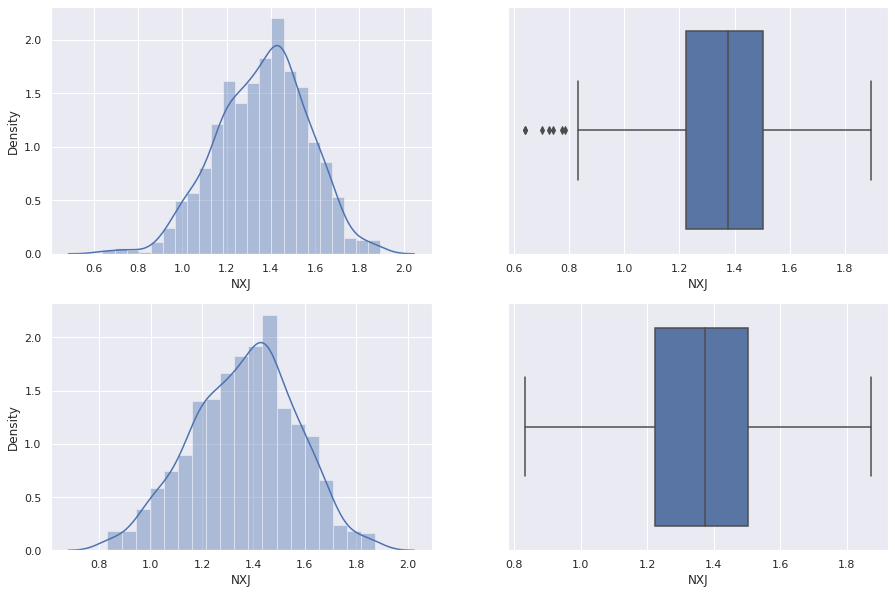

In [18]:
comparison_plot(df,df2,'NXJ')

**Split Independent and Dependent Features**

In [19]:
X = df2.drop(columns = ["TARGET CLASS"],axis = 1)
y = df2["TARGET CLASS"]

In [20]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [21]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

**Feature Scaling**

In [22]:
scaler = StandardScaler()
Scaled = scaler.fit_transform(X)

In [23]:
type(Scaled)

numpy.ndarray

In [24]:
Scaled_data = pd.DataFrame(Scaled)
Scaled_data

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.332644,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.655359
1,-1.084836,-0.430348,-1.025313,0.644676,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.641343
2,-0.788702,0.339318,0.301511,0.777837,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.386446
3,0.982841,1.060193,-0.621399,0.644585,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.044016
4,1.139275,-0.640392,-0.709819,-0.051889,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276414
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.258706,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.074194
996,-1.292453,-0.616901,0.369613,0.499007,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.488902
997,0.641777,-0.513083,-0.179205,1.049683,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.109359
998,0.467072,-0.982786,-1.465194,-0.066473,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.870473


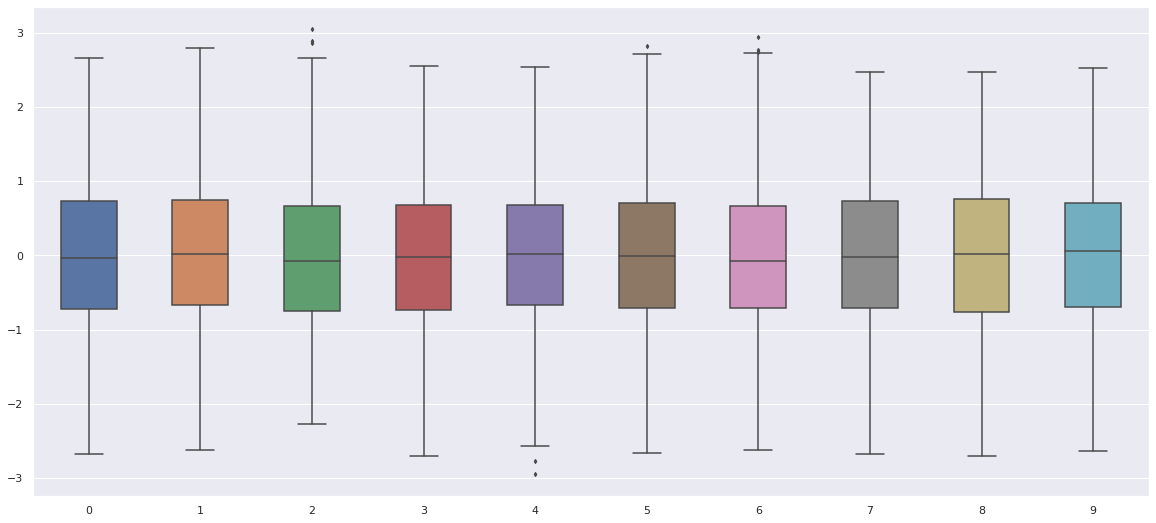

In [25]:
fig,ax = plt.subplots(figsize = (20,9))
sns.boxplot(data=Scaled_data,width = 0.5,fliersize = 3,ax=ax)

**Splitting the data for training and Testing**

In [26]:
X_train,X_test,y_train,y_test = train_test_split(Scaled_data,y,test_size = 0.30,random_state = 1)

In [27]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (700, 10)
Shape of X Test:  (300, 10)
Shape of y Train:  (700,)
Shape of y Test:  (300,)


**Model Building**

In [28]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

#Evaluation for Logistic Regression
# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  #print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

**USING KNN**

In [29]:
knn = KNeighborsClassifier(n_neighbors=560)

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=560)

In [31]:
y_pred = knn.predict(X_test)

In [32]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [33]:
print(confusion_matrix(y_test,y_pred))

[[132  29]
 [  3 136]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       161
           1       0.82      0.98      0.89       139

    accuracy                           0.89       300
   macro avg       0.90      0.90      0.89       300
weighted avg       0.91      0.89      0.89       300



**Calling direct function**

In [35]:
ML_model(KNeighborsClassifier(n_neighbors=298))  ## Able to get the K value from (Elbow method)

Confusion Matrix :
  [[145  16]
 [  2 137]]

Accuracy_Score:  94.0 %

F1 Score:  0.9383561643835616
Precision Score:  0.8954248366013072
Recall Score : 0.9856115107913669


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       161
           1       0.90      0.99      0.94       139

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# **How to Choose K Values**

In [36]:
error_rate = []

for i in range(1,600):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!= y_test))

Text(0, 0.5, 'Error Rate')

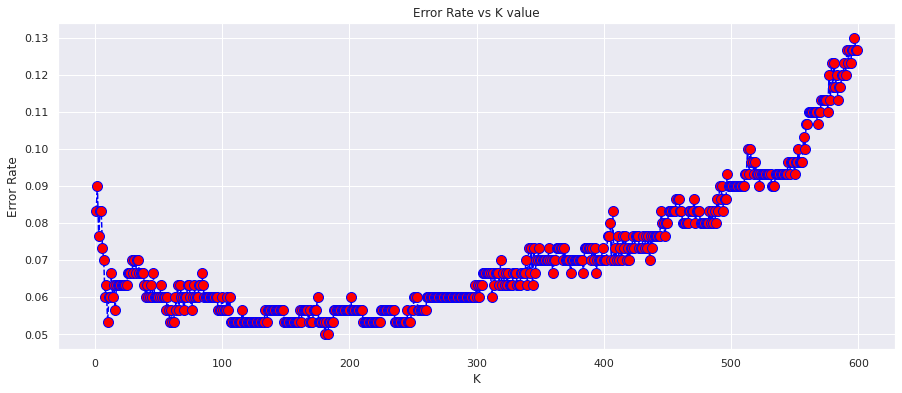

In [37]:
plt.figure(figsize = (15,6))
plt.plot(range(1,600),error_rate, color = 'blue',linestyle= 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')